In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [30]:
df.duplicated().sum()

0

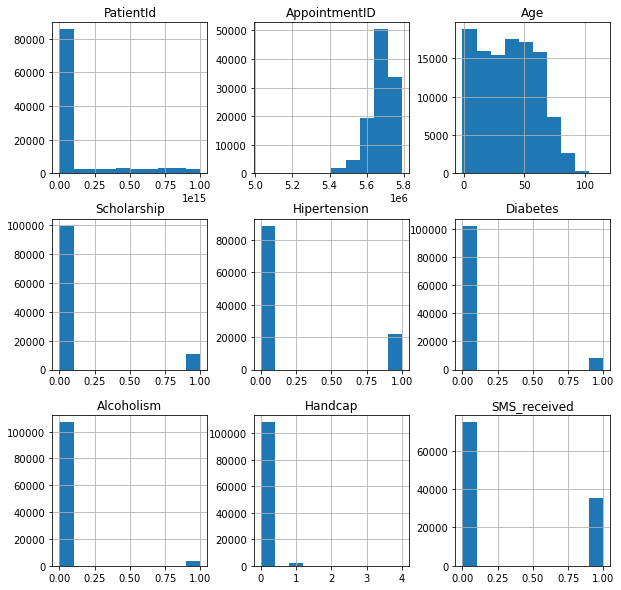

In [31]:
df.hist(figsize=(10,10));

Age has negative number

In [32]:
df.drop(df[df['Age'] < 0].index,axis=0,inplace=True)

In [33]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [34]:
def to_date(cols):
    for i in cols:
        df[i] = pd.to_datetime(df[i])

In [35]:
to_date(['AppointmentDay','ScheduledDay'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No-show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


In [37]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [38]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No-show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


In [40]:
df['time'] = df['ScheduledDay'] - df['AppointmentDay']

In [41]:
df['time'] = df['time'].dt.days

In [42]:
df.drop(df[df['time'] < 0].index,axis=0,inplace= True)

In [43]:
df.drop(['ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [44]:
df.rename({'Hipertension':'Hypertension','Handcap':'Handicap','time':'waiting_time'},axis=1,inplace=True)
df.rename(columns = lambda x: x.lower().replace('-','_'),inplace= True)

In [45]:
df['gender'] = df['gender'].map({'F':'Female','M':'Male'})

df

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,Female,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,Male,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,Female,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,Female,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,Female,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...
110511,Female,14,MARIA ORTIZ,0,0,0,0,0,0,No,0
110512,Female,41,MARIA ORTIZ,0,0,0,0,0,0,No,0
110513,Male,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,0
110514,Female,58,MARIA ORTIZ,0,0,0,0,0,0,No,0


**Proportion of Males and Females that show up for appointment**

> Out of all the people

In [46]:
# total number of males and females
total_female = df['gender'].value_counts()[0]
total_male = df['gender'].value_counts()[1]
print('total number of females:',total_female)
print('total number of males:',total_male)

total number of females: 23769
total number of males: 14798


In [47]:
total_female_show_yes = df[df['no_show']=='Yes'][['gender']].value_counts()[0]
total_male_show_yes = df[df['no_show']=='Yes'][['gender']].value_counts()[1]
print('total number of females that showed up:',total_female_show_yes)
print('total number of males that showed up:',total_male_show_yes)

total number of females that showed up: 920
total number of males that showed up: 877


In [51]:
df.groupby(['no_show','gender']).count().loc['Yes']['age']

gender
Female    920
Male      877
Name: age, dtype: int64

In [53]:
# proportion of females that showed up to total number of females
female_prop = total_female_show_yes/total_female
print('Proportion of females that showed up:',female_prop)

Proportion of females that showed up: 0.038705877403340486


In [54]:
# proportion of males that showed up to total number of males
male_prop = total_male_show_yes/total_male
print('Proportion of males that showed up:',male_prop)

Proportion of males that showed up: 0.05926476550885255


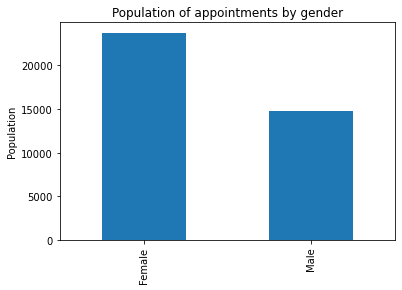

In [55]:
df['gender'].value_counts().plot.bar()
plt.title('Population of appointments by gender')
plt.ylabel('Population');

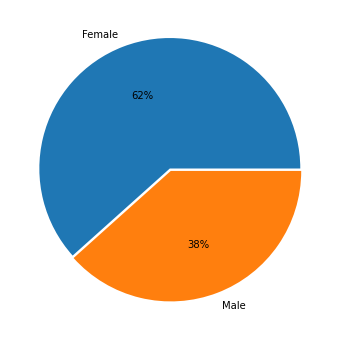

In [85]:
plt.figure(figsize=(6,6))
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index,autopct='%.0f%%',explode=[0.01,0.01]);

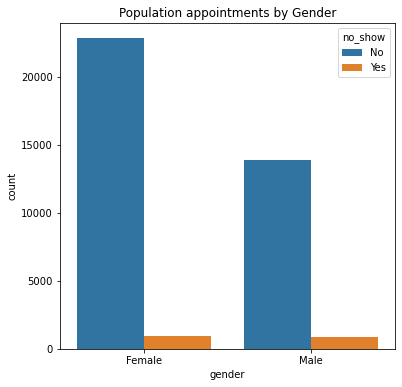

In [71]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='gender',hue='no_show')
plt.title('Population appointments by Gender');

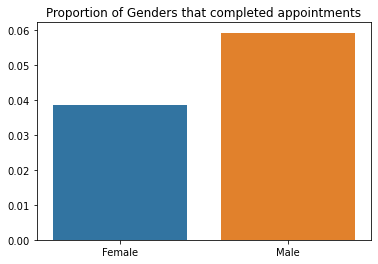

In [61]:
sns.barplot(x=['Female','Male'],y=[female_prop,male_prop])
plt.title('Proportion of Genders that completed appointments');

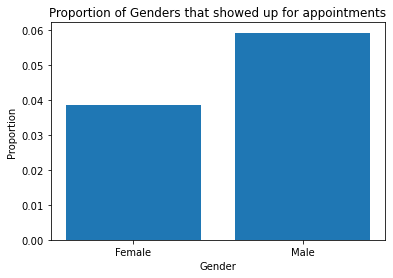

In [23]:
plt.bar(['Female','Male'],[female_prop,male_prop])
plt.title('Proportion of Genders that showed up for appointments')
plt.xlabel('Gender')
plt.ylabel('Proportion');

Even though the number of females that registered for appointments is greater than that of the males, our analysis shows that males show up for their appointment than females

**In which neighbourhood did patients show up the most?**

In [24]:
df.explode('age')

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time
0,Female,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,Male,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,Female,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,Female,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,Female,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...
110511,Female,14,MARIA ORTIZ,0,0,0,0,0,0,No,0
110512,Female,41,MARIA ORTIZ,0,0,0,0,0,0,No,0
110513,Male,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,0
110514,Female,58,MARIA ORTIZ,0,0,0,0,0,0,No,0


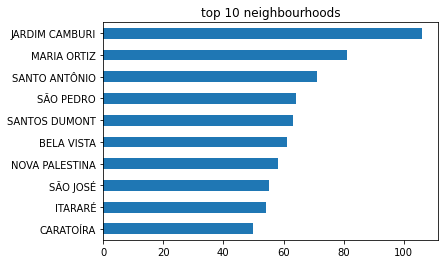

In [25]:
top_ten_neighbourhoods = df.query('no_show == "Yes"')['neighbourhood'].value_counts().head(10)
top_ten_neighbourhoods.sort_values().plot.barh()
plt.title('top 10 neighbourhoods');

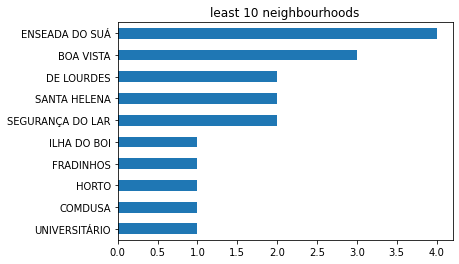

In [26]:
# least_ten_neighbourhoods
least_ten_neighbourhoods = df.query('no_show == "Yes"')['neighbourhood'].value_counts().tail(10)
least_ten_neighbourhoods.sort_values().plot.barh()
plt.title('least 10 neighbourhoods');

JARDIM CAMBURI is the location where the patients show up the most. 106 appointments were kept to

In [27]:
df['age'].value_counts()

0      1408
1      1189
2       901
3       704
38      634
       ... 
97        5
102       1
115       1
98        1
99        1
Name: age, Length: 102, dtype: int64

In [28]:
df.scholarship.value_counts()

0    34377
1     4190
Name: scholarship, dtype: int64

In [29]:
df.query('no_show == "Yes"')['scholarship'].value_counts()

0    1552
1     245
Name: scholarship, dtype: int64

In [90]:
df['age_group'] = pd.cut(x=df['age'],bins =[0,20,40,60,80,100,120],labels = ['0-20','21-40','41-60','61-80','81-100','101-120'])

In [91]:
df

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_time,age_group
0,Female,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,61-80
1,Male,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,41-60
2,Female,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,61-80
3,Female,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0-20
4,Female,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...
110511,Female,14,MARIA ORTIZ,0,0,0,0,0,0,No,0,0-20
110512,Female,41,MARIA ORTIZ,0,0,0,0,0,0,No,0,41-60
110513,Male,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,0,0-20
110514,Female,58,MARIA ORTIZ,0,0,0,0,0,0,No,0,41-60


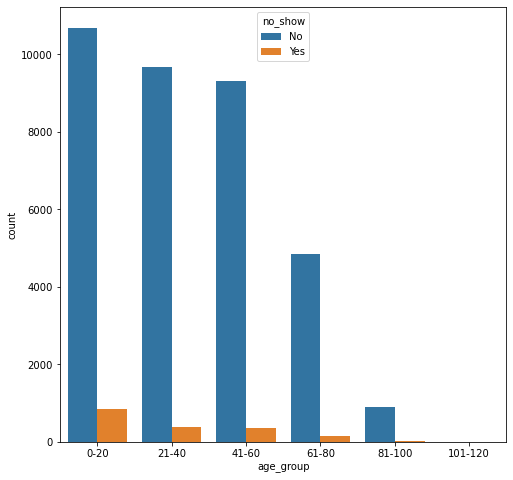

In [92]:
plt.figure(figsize=(8,8))
sns.countplot(x='age_group',hue='no_show',data=df);

In [93]:
df_age_group = df.groupby('age_group').count()['gender']

In [94]:
df_age_group_present = df.groupby(['no_show','age_group']).count().loc['Yes']['gender']

In [95]:
df_age = pd.concat([df_age_group,df_age_group_present],axis=1)

In [96]:
df_age.columns=['total_count','show_up_count']

In [97]:
df_age['proportion'] = df_age['show_up_count']/df_age['total_count']

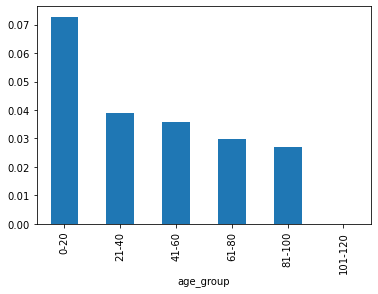

In [98]:
plt.figure(figsize=(6,4))
df_age['proportion'].plot(kind='bar');

In [99]:
df_age.index

CategoricalIndex(['0-20', '21-40', '41-60', '61-80', '81-100', '101-120'], categories=['0-20', '21-40', '41-60', '61-80', '81-100', '101-120'], ordered=True, dtype='category', name='age_group')

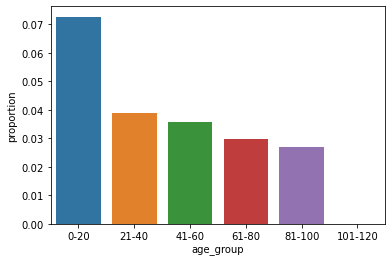

In [100]:
sns.barplot(data=df_age,x=df_age.index,y='proportion');

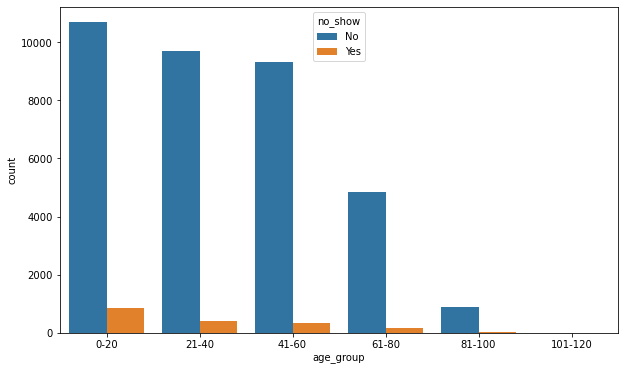

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_group',data=df,hue='no_show');

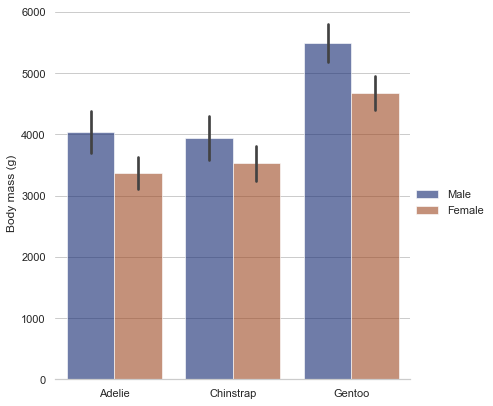

In [109]:

sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")